The purpose of this notebook is to practice calcualtions related to the process of splitting decision trees. 

In [30]:
import pandas as pd
from scipy.stats import entropy

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier

from sklearn import tree
from sklearn.tree import plot_tree

In [6]:
tree_data= pd.read_excel('/Users/danielaquijano/Documents/GitHub/Machine-Learning-Course-Projects/sourcefiles/Tree_split_data.xlsx')

In [7]:
#Color Category has been changed. 0 represents white, 1 represents brown
tree_data

,Poisonous,Size,Spots,Color
0,n,1,n,0
1,n,5,n,0
2,n,2,y,0
3,n,2,n,1
4,n,3,y,1
5,n,4,n,0
6,n,1,n,1
7,y,5,y,0
8,y,4,y,1
9,y,4,y,1


In [12]:
tree_data['Poisonous']=[0,0,0,0,0,0,0,1,1,1,1,1] #Replace y/n with 0 or 1. 

In [17]:
tree_data['Spots']=[0,0,1,0,1,0,0,1,1,1,1,1] #Replace y/n in spots to 0 or 1

In [18]:
tree_data

,Poisonous,Size,Spots,Color
0,0,1,0,0
1,0,5,0,0
2,0,2,1,0
3,0,2,0,1
4,0,3,1,1
5,0,4,0,0
6,0,1,0,1
7,1,5,1,0
8,1,4,1,1
9,1,4,1,1


1. What is the entropy of the target variable, “poisonous”?
2. What is the first attribute a decision tree trained using the entropy and the information gain method
3. What is the information gain of this attribute?
4. Draw the full decision tree learned from this data set .

The column with the highest entropy is size. The higher the entropy, the higher the information content. 

In [14]:
entropy(tree_data['Poisonous']) #The entropy of the 'poisonous column is 1.69'

1.6094379124341005

In [15]:
entropy(tree_data['Size']) #The entropy of size is 2.32

2.3208003782536375

In [19]:
entropy(tree_data['Spots']) #The entropy of spots is 1.94

1.945910149055313

In [20]:
entropy(tree_data['Color']) #The entropy of coor is 1.79

1.7917594692280547

Make decision tree with the data. Target variable is the prediction of colummn 'poisonous'

In [32]:
#Train test split. 20% train size
X = tree_data.drop('Poisonous',axis=1)
y = tree_data['Poisonous']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [33]:
#Fit model
dec_tree= DecisionTreeClassifier(criterion='entropy')
dec_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [34]:
#Make predictions with test data
predictions_DT = dec_tree.predict(X_test)

In [35]:
#Show classification report. 100% acccuracy in predictions of y/n poinsonous
print(classification_report(y_test,predictions_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



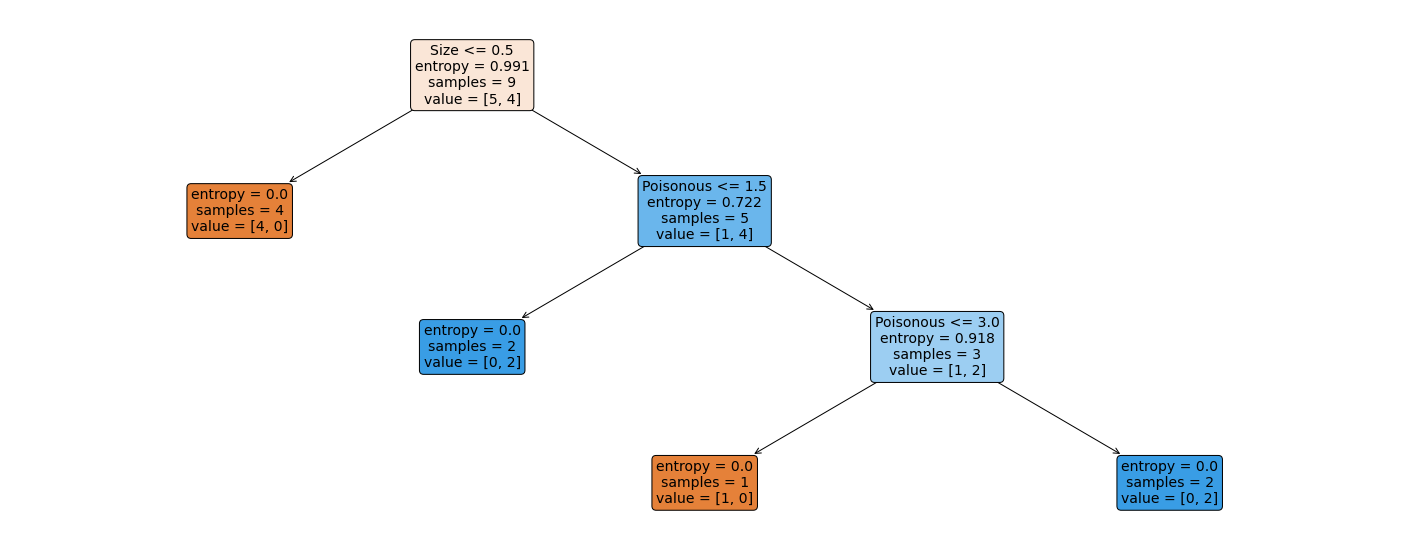

In [36]:
plt.figure(figsize=(25,10))
a = plot_tree(dec_tree,  
              feature_names = tree_data.columns, 
              filled=True, 
              rounded=True, 
              fontsize=14)